<a href="https://colab.research.google.com/github/Mrkoi2002/AI/blob/main/fashion_Mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import load_model

from keras.datasets.fashion_mnist  import load_data

(x_train, y_train), (x_test, y_test) = load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
y_train.shape

(60000,)

In [19]:
x_test.shape

(10000, 28, 28)

In [20]:
y_test.shape

(10000,)

Hinh so: 5


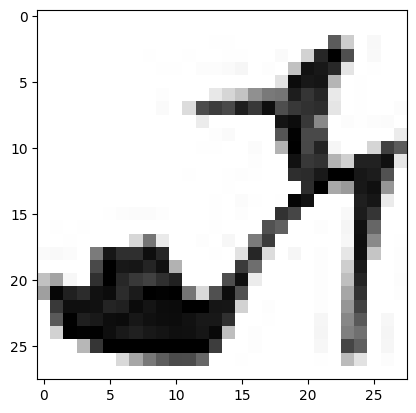

In [21]:
import matplotlib.pyplot as plt
hinh= x_train[9]   #Lấy hình ở vị trí thứ 9
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("Hinh so:",y_train[9])

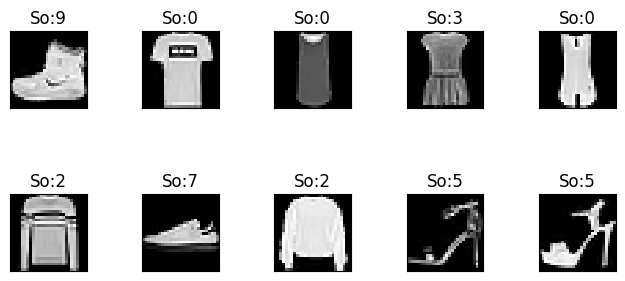

In [22]:
for i in range(10):
  plt.subplot(3,5,i+1)  
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [23]:
model= Sequential()
model.add(Dense(512, input_shape = (28*28,), activation = 'relu'))
model.add(Dense(10,activation= 'linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
x_train = x_train.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [25]:
#Lệnh chuyển kênh
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [26]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 9.9057 - accuracy: 0.2743
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 9.9669 - accuracy: 0.2758
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 9.9030 - accuracy: 0.2

In [27]:
#Lưu file vừa train
model.save('model_fashion_mnist.h5')

In [28]:
# Tải mô hình từ file đã lưu
model = load_model('./model_fashion_mnist.h5')